In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd

from matplotlib.ticker import ScalarFormatter

mpl.rc('font', size=20)

In [47]:
def parse_values(x):
    try:
        return ['_'.join(x.split()[0].split('_')[:-1]), int(x.split()[0].split('_')[-1]), *tuple(float(a) for a in x.split()[-11:-6])]
    except:
        return None

In [67]:
def hidden_size_picture(file_name, figure_file):
    
    with open(file_name, "r") as f:
        results = f.read()

    results = results.split('\n')
    results = [re.sub('[\[\]]', '', x) for x in results]
    results = [re.sub('lgbm ', '', x) for x in results]
    results = [re.sub('nn ', '', x) for x in results]

    metric_name = results[8].split()[-1].replace('"','')
    metric_name = {
        'auroc' : 'AUROC',
        'accuracy': 'Accuracy'
    }[metric_name]

    results = [re.sub('mles_embeddings', 'emb_mles__hidden_size_1000', x) for x in results]

    results = results[[i for i, x in enumerate(results) if 'scores_test' in x][0]:]

    results = [parse_values(x) for x in results]
    results = results[next(i for i, item in enumerate(results) if item is not None):]
    results = results[:next(i for i, item in enumerate(results) if item is None)]
    results = pd.DataFrame(results, columns = ['model_type', 'hidden_size'] + [f'valid.{i}' for i in range(5)])

    df2 = pd.melt(
        results,
        id_vars=['model_type', 'hidden_size'],
        var_name='fold_n',
        value_vars=[f'valid.{i}' for i in range(5)],
        value_name=metric_name,
    )

    with mpl.rc_context() as rc:
        mpl.rc("figure", figsize=(10,10))
        mpl.rc('font', size=20)

        ax = sns.lineplot(
            x='Embedding size',
            y=metric_name,
            palette='tab10',
            data=df2
            .rename(columns={'hidden_size': 'Embedding size'}),
            ci=95,
        )

        ax.set_xlabel('Embedding size')
        ax.set_xscale('log')

        # ax.set(ylim=(0.74, 0.89))
        ax.set_facecolor('white')

        x_ticks = [2 ** i for i in range(5, 11)]
        plt.xticks(x_ticks,(str(x) for x in x_ticks))
        #plt.grid(color='white')

        mpl.pyplot.savefig(figure_file, format='pdf', bbox_inches='tight')

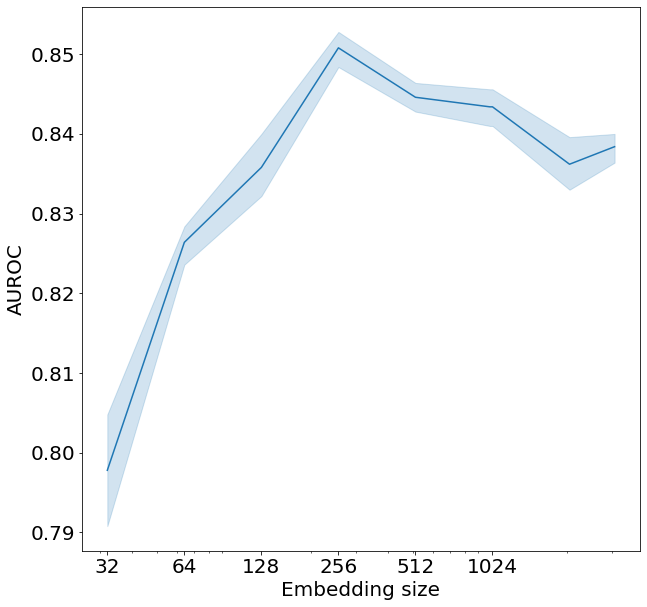

In [68]:
file_name = "../scenario_rosbank/results/scenario_rosbank__hidden_size.txt"
figure_file = 'figures/hidden_size_rosbank.pdf'

hidden_size_picture(file_name, figure_file)

In [ ]:
dataset = 'age_pred'

file_name = f"../scenario_{dataset}/results/scenario_{dataset}__hidden_size.txt"
figure_file = f'figures/hidden_size_{dataset}.pdf'

hidden_size_picture(file_name, figure_file)